# Проект "Отток клиентов"

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных-проекта" data-toc-modified-id="Обзор-данных-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных проекта</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Метод-Upsampling" data-toc-modified-id="Метод-Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метод Upsampling</a></span></li><li><span><a href="#Метод-Downsampling" data-toc-modified-id="Метод-Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод Downsampling</a></span></li><li><span><a href="#Использование-моделей-с-взвешенными-признаками" data-toc-modified-id="Использование-моделей-с-взвешенными-признаками-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Использование моделей с взвешенными признаками</a></span></li><li><span><a href="#Настройка-модели-&quot;Случайный-лес&quot;" data-toc-modified-id="Настройка-модели-&quot;Случайный-лес&quot;-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Настройка модели "Случайный лес"</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# 1. Подготовка данных

### Обзор данных проекта

In [56]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.utils import shuffle
sns.set_theme()

In [57]:
# прочитаем и сохраним данные 
data = pd.read_csv('./datasets/Churn.csv')

# выведем основную информацию о датафрейме
print('\n\033[1mПервые строки датафрейма\033[0m')
display(data.head())
print('\n\033[1mИнформация о датафрейме\033[0m\n')
print(data.info())
print("\n\033[1mОсновные описательные характеристика датафрейма\033[0m")
display(data.describe())


Первые строки датафрейма


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Основные описательные характеристика датафрейма


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Проверим наличие явных и неявных дубликатов в датафрейме

In [58]:
print('\033[1mКоличество явных дубликатов в датафрейме равно:\033[0m', data.duplicated().sum(), end='\n\n')

categorial_columns = ['CustomerId', 'Surname', 'Geography', 'Gender', 'NumOfProducts', 'Exited']

for name in categorial_columns:
    print(f'\033[1mУникальные значения столбца {name}\033[0m')
    print(data[name].value_counts(), '\n')

Количество явных дубликатов в датафрейме равно: 0

Уникальные значения столбца CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64 

Уникальные значения столбца Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64 

Уникальные значения столбца Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Уникальные значения столбца Gender
Male      5457
Female    4543
Name: Gender, dtype: int64 

Уникальные значения столбца NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64 

Уникальные значения столбца Exited
0    7963
1    2037
Name: Exited, dtype: int64 



При предварительном ознакомлении с данными обнаружено, что целевой признак имеет дисбаланс значений. Для лучшего понимания дисбаланса построим столбчатую диаграмму значений целевого признака.

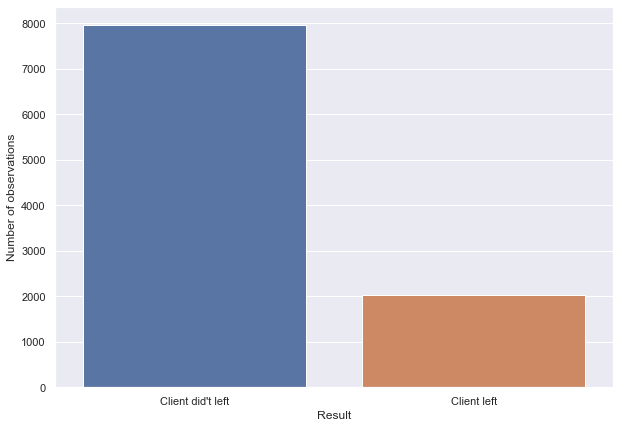

In [59]:
y1, y2 = data['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x =["Client did't left", "Client left"], y=[y1, y2])

plt.xlabel('Result')
plt.ylabel('Number of observations')
plt.show()

Из основной информации о датафрейме можно увидеть следующее:
- столбец RowNumber дублирует индексы таблицы;
- столбец Tenure имеет пропущенные значения;
- столбец EstimatedSalary имеет очень маленькое минимальное значение;
- столбец с целевым признаком Exited имеет дисбаланс значений, а именно маленькое количество положительных ответов.
- датафрейм не содержит дубликатов

# 2. Предобработка данных

Так как столбец "CustomerId" и "Surname" содержат большое количество уникальных значения ID клиента и его фамилии, то эти данные не могут оказать влияния на целевой признак. Исключим данные столбцы из датафрейма. 
Так же удалим из датафрейма дублирующий индексы столбец "RowNumber"

In [60]:
data = data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)

Заполним пропущенные значения в столбце 'Tenure' случайными значениями из тех, которые уже имеются в нем.

In [61]:
print('Количество пропущенных значений в столбцах датафрейма равно: \n{}\n'.format(data.isna().sum()))
# зафиксируем значение псевдослучайности
np.random.seed(14)

# к интересующему столбцу применим функцию, заполняющую пропуски случайным значением из списка его исходных значений
data['Tenure'] = data['Tenure'].apply(
    lambda x: x if not np.isnan(x) else np.random.choice(
        np.arange(max(data['Tenure'].unique() + 1))
    )
)
print('Количество пропущенных значений в столбцах датафрейма после обработки равно: \n{}'.format(data.isna().sum()))

Количество пропущенных значений в столбцах датафрейма равно: 
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Количество пропущенных значений в столбцах датафрейма после обработки равно: 
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Для дальнейшего использования данных в обучении модели классификации преобразуем категориальные данные в числовые.

- Преобразуем столбцы 'Geography' и 'Gender' с помощью прямого кодирования;
- Преобразуем столбец 'NumOfProducts' с помощью прямого кодирования, так как он делит людей на 4 класса по количеству используемых продуктов.

In [62]:
# для прямого кодирования используем метод get_dummies 
data_conv = pd.get_dummies(data, columns=['Geography', 'Gender', 'NumOfProducts'])

data_conv.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2.0,0.00,1,1,101348.88,1,1,0,0,1,0,1,0,0,0
1,608,41,1.0,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0
2,502,42,8.0,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,1,0
3,699,39,1.0,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,850,43,2.0,125510.82,1,1,79084.10,0,0,0,1,1,0,1,0,0,0


Промасштабируем числовые данные датафрейма. 
Чтобы избежать потери качества модели, разделим датафрейм на тренировочный и тестовый. Для этого создадим специальную функцию. 

In [63]:
def data_preparation(data, target_name, target_volume):
    
    features = data.drop(target_name, axis=1)
    target = data[target_name]
    
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=target_volume, random_state=14)
    return X_train, X_test, y_train, y_test

Объявим тренировочные и тестовые данные, полученные на основе исходного датафрейма.

In [64]:
X_train, X_test, y_train, y_test = data_preparation(data_conv, 'Exited', 0.25)

Обучим масштабирующую функцию только на тренировочной выборке и преобразуем их.

In [65]:
# для масштабирования воспользуемся функцией StandardScaler
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'] # список столбцов датафрейма с числовыми значениями

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

### Вывод:

В результате ознакомления и  предобработки данных сделано следующее:
- рассмотрена информация о данных и их основные характеристики;
- проведена проверка датафрейма на наличие явных и неявных дубликатов;
- заполнены пропущенные значения;
- исключены из рассмотрения столбцы с лишней информацией;
- проведено декодирования категориальных данных в числовые;
- промасштабированы числовые данные.

# 3. Исследование задачи

Из предварительного ознакомления с данными видно, что целевой признак имеет дисбаланс значений. Выведем значения имеющегося дисбаланса.

In [66]:
disbalance_values = data['Exited'].value_counts(normalize=True)
disbalance_values

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Количество отрицательных значений почти в 4 раза больше, чем положительных.

В качестве исследования, обучим модель классификации на имеющихся данных с дисбалансом. Посчитаем метрику качества F1. Проверим три модели - RandomForest, Support Vector Machine и LogisticRegressor. Определим модель с наилучшим результатом метрики F1.

Создадим функцию, которая выводит основные метрики классификации.

In [67]:
def main_metrics(y_test, prediction, probabilities):
       
    F1 = f1_score(y_test, prediction)
    roc_aug = roc_auc_score(y_test, probabilities)
    #accuracy = accuracy_score(y_test, prediction)
    #precision = precision_score(y_test, prediction)
    #recall = recall_score(y_test, prediction)
    
    return print(f"Метрика F1-score = {F1.round(3)},\nМетрика ROC-AUC = {roc_aug.round(3)}")

#print(f"""Для данной модели основные метрики имеют следующие значения:
#Метрика F1 = {F1.round(3)}
#Метрика ROC_AUC = {roc_aug.round(3)}""")
#Метрика Accuracy = {accuracy.round(3)}
#Метрика Precision = {precision.round(3)}
#Метрика Recall = {recall.round(3)}""")

Проверим модель "Логистическая регрессия" на данный с дисбалансным целевым признаком.

In [68]:
model = LogisticRegression(random_state=13, solver='liblinear')
model.fit(X_train, y_train)
prediction_lr = model.predict(X_test)
probabilities_lr = model.predict_proba(X_test)[:, 1]

print(f'Для данной модели основные метрики имеют следующие значения:')
main_metrics(y_test, prediction_lr, probabilities_lr)

Для данной модели основные метрики имеют следующие значения:
Метрика F1-score = 0.46,
Метрика ROC-AUC = 0.84


Проверим модель "Случайный лес" на тех же данных.

In [69]:
model = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=13)

model.fit(X_train, y_train)
prediction_rf = model.predict(X_test)
probabilities_rf = model.predict_proba(X_test)[:, 1]

print(f'Для данной модели основные метрики имеют следующие значения:')
main_metrics(y_test, prediction_rf, probabilities_rf)

Для данной модели основные метрики имеют следующие значения:
Метрика F1-score = 0.569,
Метрика ROC-AUC = 0.853


Проверим модель "SVM" на тех же данных.

In [70]:
SVC_model = SVC(probability=True, random_state=14)
SVC_model.fit(X_train, y_train)
prediction_SVC = SVC_model.predict(X_test)
probabilities_SVC = SVC_model.predict_proba(X_test)[:, 1]

print(f'Для данной модели основные метрики имеют следующие значения: ')
main_metrics(y_test, prediction_SVC, probabilities_SVC)

Для данной модели основные метрики имеют следующие значения: 
Метрика F1-score = 0.505,
Метрика ROC-AUC = 0.827


Для дальнейшего удобства создадим функцию, которая будет считать основные показатели метрик для выбранных моделей со стандартными гиперпараметрами.

In [71]:
def model_chek(X_train, y_train, X_test, y_test, class_weight_loc=None):
    
    X_train_loc, y_train_loc = X_train, y_train
    X_test_loc, y_test_loc = X_test, y_test
    
    # проверочная модель логистической регрессии
    LR_model = LogisticRegression(random_state=13, solver='liblinear', class_weight=class_weight_loc)
    LR_model.fit(X_train_loc, y_train_loc)
    LR_prediction = LR_model.predict(X_test_loc)
    LR_probabilities = LR_model.predict_proba(X_test_loc)[:, 1]
    
    print('Модель "Логиситческа регрессия" имеет следующие метрики качества:')
    main_metrics(y_test_loc, LR_prediction, LR_probabilities)

    print('\n ---------- \n')
    
    # проверочная модель случайного леса
    RFC_model = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=13, class_weight=class_weight_loc)
    RFC_model.fit(X_train_loc, y_train_loc)
    RFC_prediction = RFC_model.predict(X_test_loc)
    RFC_probabilities = RFC_model.predict_proba(X_test_loc)[:, 1]

    print('Модель "Случайный лес" имеет следующие метрики качества:')
    main_metrics(y_test_loc, RFC_prediction, RFC_probabilities)

    print('\n ---------- \n')
    
    # проверочная модель SVM
    SVC_model = SVC(probability=True, random_state=14, class_weight=class_weight_loc)
    SVC_model.fit(X_train_loc, y_train_loc)
    prediction_SVC = SVC_model.predict(X_test_loc)
    probabilities_SVC = SVC_model.predict_proba(X_test_loc)[:, 1]

    print('Модель "SVM" имеет следующие метрики качества:')
    main_metrics(y_test_loc, prediction_SVC, probabilities_SVC)

Вывод:

В результате обучения моделей классификации на данных с дисбалансным целевым признаком обнаружено, что модель "Случайный лес" имеет наилучшие значения основных метрик качества F1 = 0.563 и ROC-AUG = 0.853.

## Борьба с дисбалансом

Для улучшения качества модели классификации исключим дисбаланс целевого признака. Для этого сравним следующие методы и выберем лучший: 
- Применим метод увелечения выборки Upsampling;
- Применим метод увелечения выборки Downsampling;
- Зададим значениям признаков разный вес.

### Метод Upsampling

Создадим функцию, которая увеличит количество положительных значений целевого признака.

In [72]:
def upsampling(features, target, repeat):
    #сортирует принимаемые датафреймы и сохраняет их в новые переменные
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    # соединяет и размножает датафреймы с положительными значениями
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    #перемешивает датафреймы
    features_upsampled_shaffl = shuffle(features_upsampled, random_state=14)
    target_upsampled_shaffl = shuffle(target_upsampled, random_state=14)
    
    return features_upsampled_shaffl, target_upsampled_shaffl

Применим к тренеровочной и тестовой выборкам функцию upsampling.

In [73]:
X_train_upsm, y_train_upsm = upsampling(X_train, y_train, 3)

Обучим модели на обновленных данных

In [74]:
model_chek(X_train_upsm, y_train_upsm, X_test, y_test)

Модель "Логиситческа регрессия" имеет следующие метрики качества:
Метрика F1-score = 0.574,
Метрика ROC-AUC = 0.841

 ---------- 

Модель "Случайный лес" имеет следующие метрики качества:
Метрика F1-score = 0.6,
Метрика ROC-AUC = 0.854

 ---------- 

Модель "SVM" имеет следующие метрики качества:
Метрика F1-score = 0.624,
Метрика ROC-AUC = 0.859


***Вывод:***

В результате можно сделать следующие выводы:
- После увеличения количества положительных значений целевого признака метрика качества F1 всех моделей увеличилась.
- Наибольшие метрики качества имеет модель "SVM" F1-score = 0.624 и ROC-AUC = 0.859, однако ее обучение занимает продолжительное время.


### Метод Downsampling

Создадим функцию, которая уменьшает количество отрицательных значений целевого признака.

In [75]:
def downsampling(features, target, fraction):
    #сортирует принимаемые датафреймы и сохраняет их в новые переменные
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    # соединяет датафреймы с положительными значениями и уменьшенные датафреймы с отрицательными значениями
    features_upsampled = pd.concat([features_zero.sample(frac=fraction, random_state=14), features_one])
    target_upsampled = pd.concat([target_zero.sample(frac=fraction, random_state=14), target_one])
    
    #перемешивает датафреймы
    features_upsampled_shaffl = shuffle(features_upsampled, random_state=14)
    target_upsampled_shaffl = shuffle(target_upsampled, random_state=14)
    
    return features_upsampled_shaffl, target_upsampled_shaffl

Применим к тренеровочной и тестовой выборкам функцию downsampling.

In [76]:
fraction = y_train[y_train == 1].count() / y_train[y_train == 0].count() # отношение положительных значений целевого признака
# к отрицательным

X_train_dwsm, y_train_dwsm = downsampling(X_train, y_train, fraction)

Обучим модели на обновленных данных

In [77]:
model_chek(X_train_dwsm, y_train_dwsm, X_test, y_test)

Модель "Логиситческа регрессия" имеет следующие метрики качества:
Метрика F1-score = 0.578,
Метрика ROC-AUC = 0.84

 ---------- 

Модель "Случайный лес" имеет следующие метрики качества:
Метрика F1-score = 0.602,
Метрика ROC-AUC = 0.857

 ---------- 

Модель "SVM" имеет следующие метрики качества:
Метрика F1-score = 0.608,
Метрика ROC-AUC = 0.861


### Использование моделей с взвешенными признаками

In [78]:
model_chek(X_train, y_train, X_test, y_test, class_weight_loc='balanced')

Модель "Логиситческа регрессия" имеет следующие метрики качества:
Метрика F1-score = 0.573,
Метрика ROC-AUC = 0.84

 ---------- 

Модель "Случайный лес" имеет следующие метрики качества:
Метрика F1-score = 0.566,
Метрика ROC-AUC = 0.851

 ---------- 

Модель "SVM" имеет следующие метрики качества:
Метрика F1-score = 0.614,
Метрика ROC-AUC = 0.862


***Вывод:***

Исходя из результатов работы моделей, обученных на данных с дисбалансом и без него, видно, что в данной задаче классификации модель "SMV" показывает наилучшие результаты. Однако метрики качества модели "Случайный лес", обученной на Downsample данных, не сильно отличаются от метрик качества модели "SVM", но скорость обучения "Случайного леса" выше. Следовательно, в дальнейшем целесообразно использовать модель классификации "Случайный лес".

### Настройка модели "Случайный лес"

Для улучшения показателей модели подберем основные гиперпараметры с помощью кросс-валидации. 

***Нахождение наилучшего значения гиперпараметра max_depth***

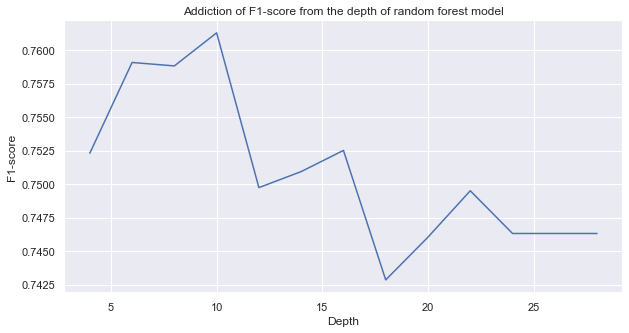

In [86]:
#зададим диапазон значений интересуемого параметра
x = np.arange(4, 30, 2) 
y = []

#с помощью кросс-валидации получим значения метрики f1 с разными значениями параметра
for depth in x:
    check_model = RandomForestClassifier(
        max_depth=depth,
        n_estimators=20,
        random_state=13,
        n_jobs=-1
    )
    f1_valid = cross_val_score(check_model, X_train_dwsm, y_train_dwsm, cv=10, n_jobs=-1, scoring='f1')
    y.append(np.mean(f1_valid))

#построим график на основе которого выберем наилучшее значение   
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(x, y)

plt.xlabel('Depth')
plt.ylabel('F1-score')
plt.title('Addiction of F1-score from the depth of random forest model')
plt.show()

Из графика видно, что наилучший результат метрики F1-score получается при значении параметра max_depth = 10. Для исключения переобучение возьмем значение max_depth = 8.

***Нахождение наилучшего значения гиперпараметра max_features***

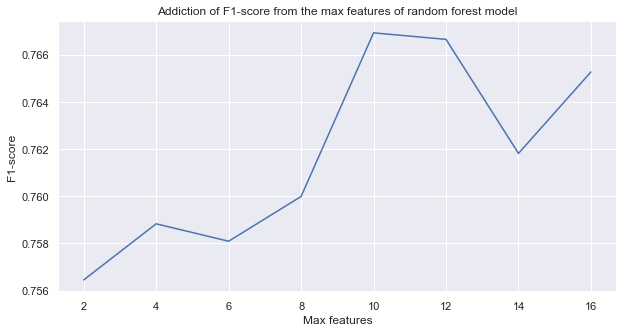

In [87]:
#зададим диапазон значений интересуемого параметра
x = np.arange(2, 17, 2) 
y = []

#с помощью кросс-валидации получим значения метрики f1 с разными значениями параметра
for features in x:
    check_model = RandomForestClassifier(
        max_depth=8, 
        max_features=features, 
        n_estimators=20, 
        random_state=13, 
        n_jobs=-1
    )
    f1_valid = cross_val_score(check_model, X_train_dwsm, y_train_dwsm, cv=10, n_jobs=-1, scoring='f1')
    y.append(np.mean(f1_valid))

#построим график на основе которого выберем наилучшее значение   
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(x, y)

plt.xlabel('Max features')
plt.ylabel('F1-score')
plt.title('Addiction of F1-score from the max features of random forest model')
plt.show()

Из графика видно, что наилучший результат метрики F1-score получается при значении параметра max_features = 10. Для исключения переобучение возьмем значение max_features = 16.

***Нахождение наилучшего значения гиперпараметра min_samples_leaf***

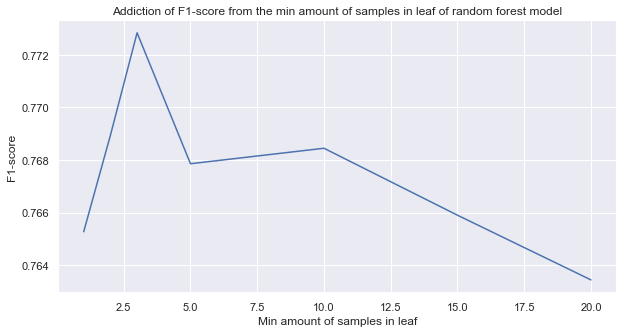

In [88]:
#зададим диапазон значений интересуемого параметра
x = [1, 2, 3, 5, 10, 15, 20]
y = []

#с помощью кросс-валидации получим значения метрики f1 с разными значениями параметра
for leaf in x:
    check_model = RandomForestClassifier(
        max_depth=8, 
        max_features=16,
        min_samples_leaf=leaf,
        n_estimators=20, 
        random_state=13, 
        n_jobs=-1
    )
    f1_valid = cross_val_score(check_model, X_train_dwsm, y_train_dwsm, cv=10, n_jobs=-1, scoring='f1')
    y.append(np.mean(f1_valid))

#построим график на основе которого выберем наилучшее значение   
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(x, y)

plt.xlabel('Min amount of samples in leaf')
plt.ylabel('F1-score')
plt.title('Addiction of F1-score from the min amount of samples in leaf of random forest model')
plt.show()

Из графика видно, что наилучший результат метрики F1-score получается при значении параметра min_samples_leaf = 3.

***Нахождение наилучшего значения гиперпараметра n_estimators***

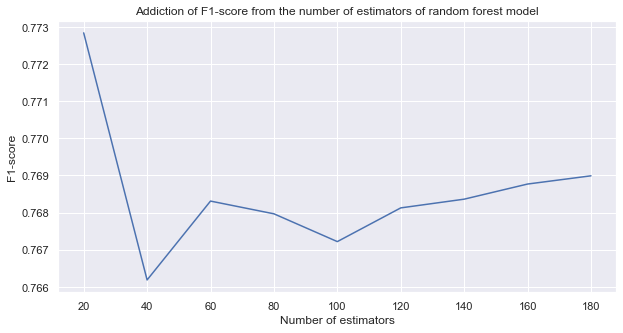

In [89]:
#зададим диапазон значений интересуемого параметра
x = np.arange(20, 200, 20)
y = []

#с помощью кросс-валидации получим значения метрики f1 с разными значениями параметра
for est_s in x:
    check_model = RandomForestClassifier(
        max_depth=8, 
        max_features=16,
        min_samples_leaf=3,
        n_estimators=est_s,
        random_state=13, 
        n_jobs=-1
    )
    f1_valid = cross_val_score(check_model, X_train_dwsm, y_train_dwsm, cv=10, n_jobs=-1, scoring='f1')
    y.append(np.mean(f1_valid))

#построим график на основе которого выберем наилучшее значение   
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(x, y)

plt.xlabel('Number of estimators')
plt.ylabel('F1-score')
plt.title('Addiction of F1-score from the number of estimators of random forest model')
plt.show()

Из графика видно, что наилучший результат метрики F1-score получается при значении параметра n_estimators = 20. Для исключения переобучения возьмем значение n_estimators = 160.

### Вывод:

В результате борьбы с дисбалансом данных получено, что наибольшее значение метрики F1-score показывает модель "Случайный лес", обученная на upsample данных. С помощью кросс-валидации на основе метрики F1-score подобраны основные гиперпараметры модели классификации.
Полученные гиперпараметры "Случайного леса": 

- max_depth=8, 
- max_features=16,
- min_samples_leaf=3,
- n_estimators=160.

## Тестирование модели

Обучим итоговую модели и проверим ее на тестовой выборке. Посчитаем основные метрики качества и построим графика ROC-кривой.

Метрика F1-score = 0.606,
Метрика ROC-AUC = 0.86



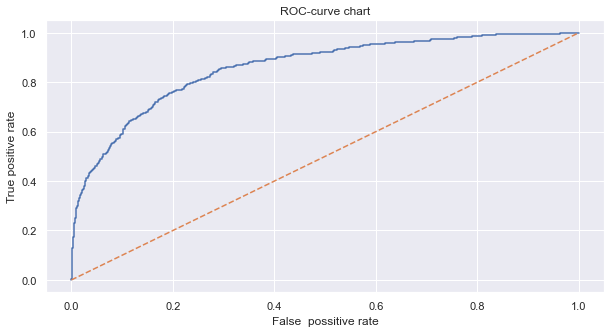

In [92]:
end_model = RandomForestClassifier(
    max_depth=8, 
    max_features=16,
    min_samples_leaf=3,
    n_estimators=160,
    random_state=13, 
    n_jobs=-1
    )

end_model.fit(X_train_dwsm, y_train_dwsm)
prediction_end = end_model.predict(X_test)
probabilities_end = end_model.predict_proba(X_test)[:, 1]

main_metrics(y_test, prediction_end, probabilities_end)

fpr, tpr, thresholds = roc_curve(y_test, probabilities_end)

print()
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='dashed')
plt.xlabel('False  possitive rate')
plt.ylabel('True positive rate')
plt.title('ROC-curve chart')
plt.show()

Получим значение важности признаков, выведем их на экран и построим график.


Таблица важности признаков:



Age                  0.341242
NumOfProducts_2      0.188752
Balance              0.125854
EstimatedSalary      0.075201
CreditScore          0.065406
NumOfProducts_1      0.056187
IsActiveMember       0.041033
Tenure               0.034842
Geography_Germany    0.024615
Gender_Male          0.008963
Gender_Female        0.008934
Geography_France     0.007651
NumOfProducts_3      0.006993
HasCrCard            0.006962
Geography_Spain      0.006808
NumOfProducts_4      0.000558
dtype: float64


График важности признаков:



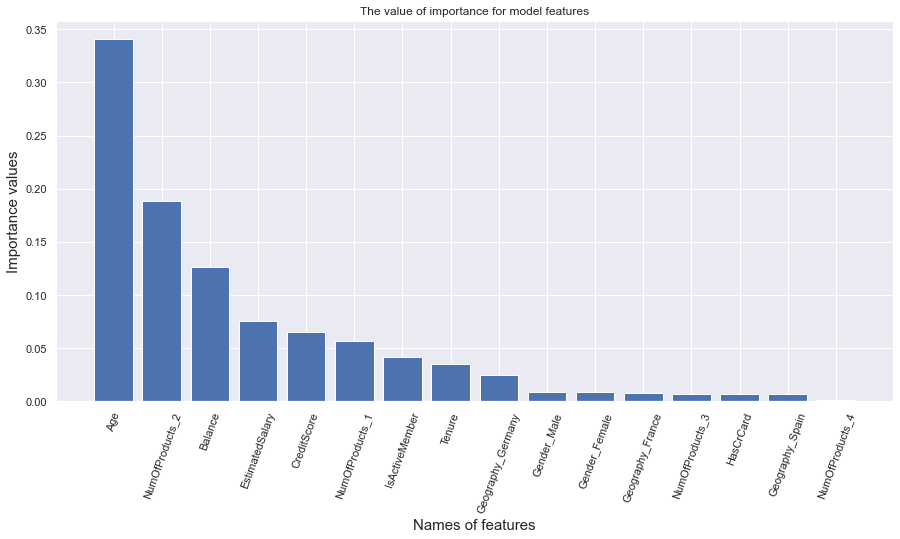

In [118]:
feature_importances_df = pd.DataFrame({"name":X_train.columns, "values":end_model.feature_importances_}).sort_values(by='values', ascending=False)

print('\n\033[1mТаблица важности признаков:\n\033[0m')
display(pd.Series(end_model.feature_importances_, index=X_train.columns).sort_values(ascending=False))

print('\n\033[1mГрафик важности признаков:\n\033[0m')

fig, ax = plt.subplots(figsize=(15,7))
plt.grid(True)

plt.bar(feature_importances_df['name'], feature_importances_df['values'])

plt.title("The value of importance for model features")
plt.xlabel('Names of features', fontsize=15)
plt.xticks(rotation=70)
plt.ylabel('Importance values', fontsize=15)
plt.show()

**Вывод:**

Метрика качества итоговой модели F1-score ровна 0.606, что удовлетворяет требованиям поставленной в исследовании задаче.

## Вывод:

В процессе построения модели классификации, которая должна спрогнозировать, уйдёт клиент из банка в ближайшее время или нет, проделана следующая работа:

1) Для дальнейшего использования в обучении модели проведена предобработка полученных данных о поведении клиентов и расторжении договоров с банком;

2) Исследован дисбаланс целевого признака в датафрейме. Проведено тестовое обучение моделей на данных с дисбплансом;

3) Применены насколько способов борьбы с дисбалансом целевого признака, в результате чего выбран метод upsampling;

4) Для улучшения качества модели подобранные основные гиперпараметры модели классификации;

5) Проведено окончательное обучения и тестирования модели на тестовой выборке. Построен график ROC-кривой, получены значения важности признаков и построен график. Результат работы итоговой модели удовлетворяет требования поставленной задачи.